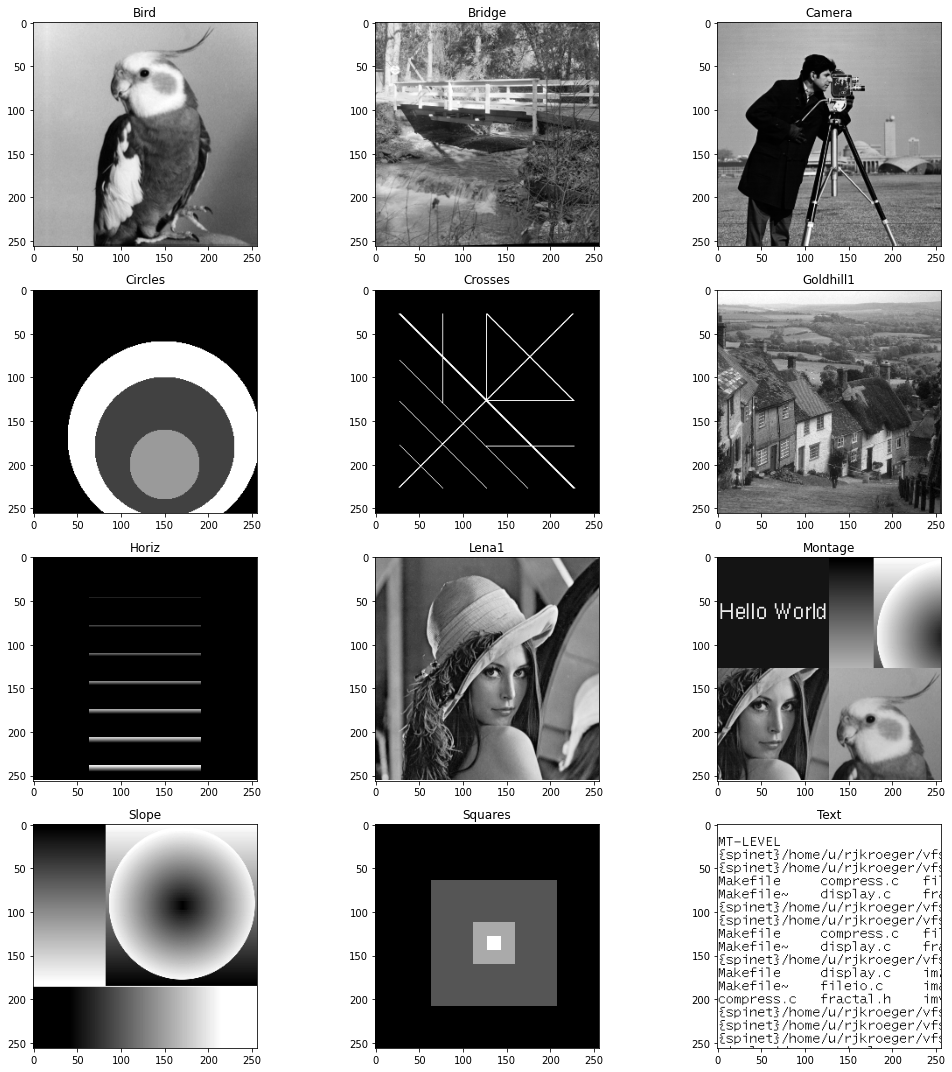

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    ax[imInd // 3, imInd % 3].imshow(np.array(im), cmap='gray')
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()




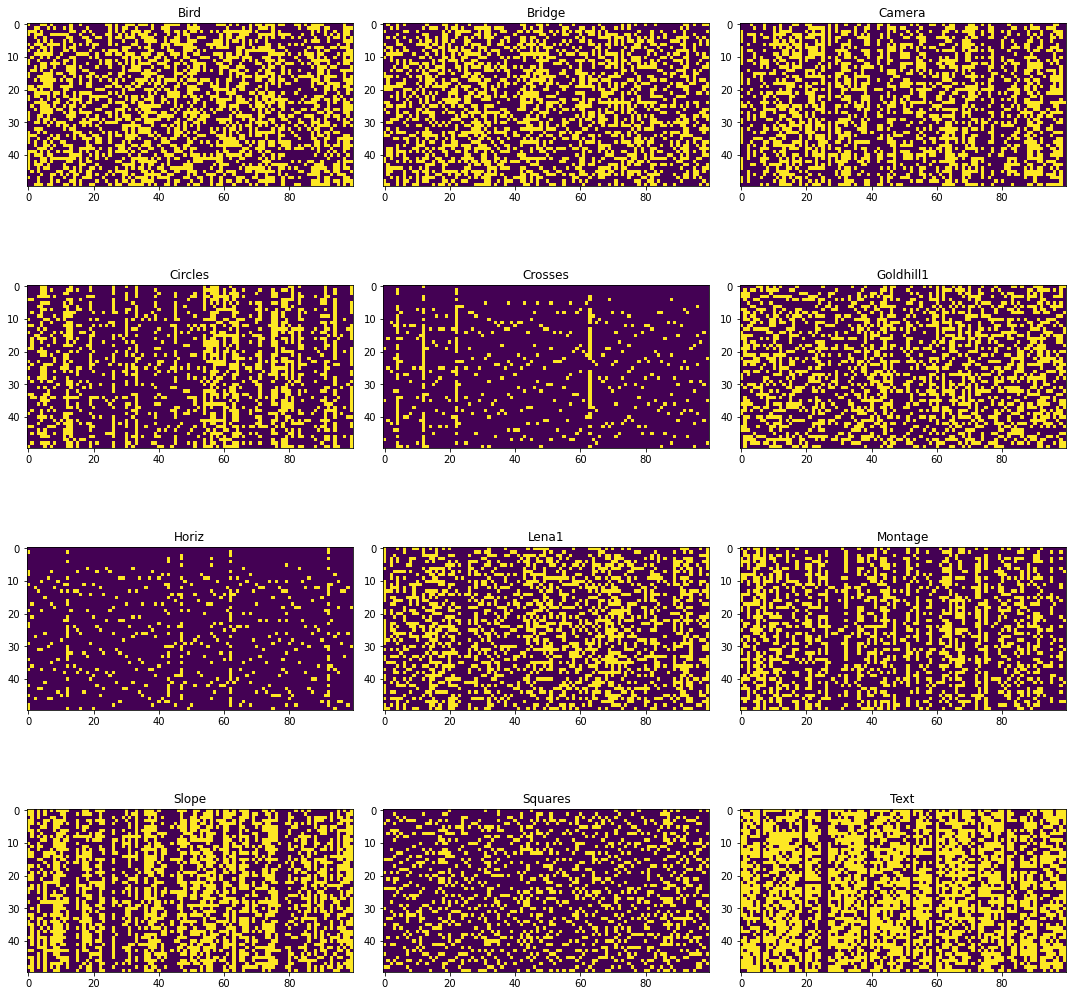

In [3]:
import torch
from encoding import TTFSEncoder, PoissonEncoder, PositionalEncoder
# image_size = 20
# encoder = NumericEncoder(7, image_size, std=10, padding=10)
# data = torch.tensor([[200, 50, 3, 44, 180],
#                      [40, 150, 32, 4, 80],
#                      [45, 40, 120, 100, 10],])

# print('pooled: ', encoder.pool(data, image_size, 'avg'))
# encoded = encoder(data)

# print(len(encoded), encoded)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

encoder = PoissonEncoder(50, 100)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    
    encoded = encoder(data=np.array(im), pooling='random')
    # print(encoded)

    ax[imInd // 3, imInd % 3].imshow(encoded)
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()



In [1]:
from experiment import learnSTDP
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im1 = np.array(Image.open(f'images/crosses.tif'))
im2 = np.array(Image.open(f'images/lena1.tif'))


result = learnSTDP(im1, im2, intersection=0, image_dur=10, N=20, iters=100, inp_amp=500, verbose=0, syn_params={'w_mean': 300, 'flat': True, 'trace_dur': 10})


100xBatch: 1/1 (100%) 433.006ms


In [2]:
print(f"images -> image_0: {result['images_history'].count(0)}, image_1: {result['images_history'].count(1)}")
print(f"old W:\n{result['oldW']}")
print(f"new W:\n{result['newW']}")
print(f"Diff W: \n{result['newW'] - result['oldW']}")


images -> image_0: 4, image_1: 6
old W:
tensor([[299.0484, 302.8136],
        [299.2776, 294.6508],
        [308.3397, 296.4540],
        [304.5040, 293.5339],
        [293.8406, 298.4706],
        [301.3246, 302.0213],
        [295.6631, 304.0426],
        [290.9775, 306.2332],
        [296.7119, 307.9940],
        [299.4699, 295.9193],
        [301.6836, 302.1787],
        [300.0663, 301.8378],
        [297.7369, 305.0073],
        [305.4781, 301.6965],
        [302.0128, 296.6917],
        [300.0597, 304.1085],
        [300.3600, 290.9083],
        [299.5963, 305.6948],
        [296.0238, 295.3015],
        [293.4634, 302.6436]])
new W:
tensor([[279.4260, 283.1912],
        [278.1775, 273.5506],
        [297.9542, 286.0686],
        [286.5871, 275.6170],
        [246.6915, 251.3215],
        [266.1179, 266.8146],
        [276.0123, 284.3918],
        [264.7265, 279.9822],
        [278.4663, 289.7484],
        [290.6798, 287.1292],
        [328.5323, 329.0274],
        [321.5291, 323

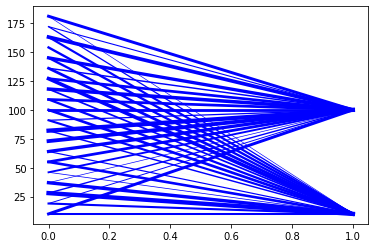

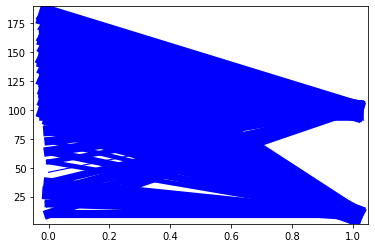

In [3]:
# from vis import draw_weights
import matplotlib.pyplot as plt
import torch

def draw_weights(weights:torch.Tensor, width=200, height=200, padding=10, scale_w=10, color='blue'):
    pre_x = torch.arange(padding, width - padding, (width - 2 * padding) // weights.shape[0])
    pre_y = torch.ones(weights.shape[0]) * padding
    post_x = torch.arange(padding, width - padding, (height - 2 * padding) // weights.shape[1])
    post_y = torch.ones(weights.shape[1]) * padding
    
    for i in range(len(pre_x)):
        for j in range(len(post_x)):
            plt.plot([pre_x[i], post_x[j]], linewidth=(weights[i][j] - weights.min()) / scale_w, color=color)
    plt.show()

draw_weights(result['oldW'], scale_w=4)
draw_weights(result['newW'], scale_w=4)



In [13]:
a = torch.tensor([1, 0, 0, 0.5, 1, 0, 0, 0, 1, 0])

b = (a == 0) * (a.sum() / (a == 0).sum())
print(b)

tensor([0.0000, 0.5833, 0.5833, 0.0000, 0.0000, 0.5833, 0.5833, 0.5833, 0.0000,
        0.5833])
